In [1]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt

In [2]:
import pygmo as pg

In [3]:
json_file = "v0.json"
j = json.load(open(json_file))

In [4]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-sparsity,gen0-time,gen1-front,gen1-sparsity,gen1-time,gen2-front,gen2-sparsity,gen2-time,total-time
0,dao-map/ost004d.map,896,3766,borda,weighted_conscious,"[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10...",32854.20,285,"[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10...",10068.40,182,"[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10...",4967.670,213,680
1,dao-map/ost004d.map,1894,1968,borda,weighted_conscious,"[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]",0.00,0,"[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]",0.00,0,"[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]",0.000,0,0
2,dao-map/ost004d.map,629,520,borda,weighted_conscious,"[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13...",1610.75,28,"[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13...",617.75,15,"[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13...",370.650,15,58
3,dao-map/ost004d.map,3848,2387,borda,weighted_conscious,"[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152...",39887.20,204,"[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152...",26591.50,95,"[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152...",26591.500,134,433
4,dao-map/ost004d.map,1075,1470,borda,weighted_conscious,"[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,...",7183.83,267,"[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,...",1815.79,160,"[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,...",1156.420,194,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,dao-map/lak100d.map,5061,18340,borda,weighted_conscious,"[[157, 175, 1567, 363, 636.5], [157, 175, 1567...",401927.00,1456,"[[157, 175, 1567, 363, 636.5], [157, 175, 1567...",128743.00,875,"[[157, 175, 1567, 363, 636.5], [157, 175, 1567...",58174.700,1100,3431
6236,dao-map/lak100d.map,13487,37840,borda,weighted_conscious,"[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5...",2775200.00,3576,"[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5...",402999.00,2189,"[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5...",237526.000,2676,8441
6237,dao-map/lak100d.map,35741,26949,borda,weighted_conscious,"[[231, 274, 2150, 559, 920], [231, 274, 2150, ...",826514.00,1510,"[[231, 274, 2150, 559, 920], [231, 274, 2150, ...",139877.00,929,"[[231, 274, 2150, 559, 920], [231, 274, 2150, ...",98833.300,1172,3611
6238,dao-map/lak100d.map,35082,33681,borda,weighted_conscious,"[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10...",49030.80,441,"[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10...",12769.10,260,"[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10...",6565.070,324,1025


In [5]:
#expecting 156 maps
maps = df['map-id'].unique()
len(maps)

156

In [8]:
# function to get df of a certain map
def get_map_df(map_name, df):
    return df[df["map-id"] == map_name]

In [7]:
def avg_sparsity(map_name, df):
    map_df = get_map_df(map_name, df)
    sparsity = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity"])
    avg = np.mean(sparsity, axis=0).to_list()
    return avg

In [10]:
sparsitys = []
for MAP in maps:
    sparsitys.append(avg_sparsity(MAP,df))

In [14]:
# Average the sparsity
avg_sparisity = np.mean(sparsitys, axis=0).tolist()
avg_sparisity
T_avg_sparsity = np.array(avg_sparisity).T.tolist()

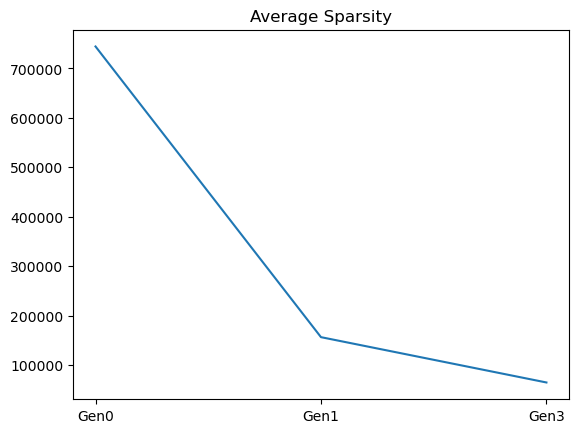

In [15]:
fig, ax = plt.subplots()
x = [0,1,2]
x_ticks = ["Gen0", "Gen1", "Gen3"]
plt.xticks(x,x_ticks)
y = avg_sparisity
ax.plot(x,y)
plt.title("Average Sparsity")
plt.show()
# Data is likely heavily skewed due to outlier

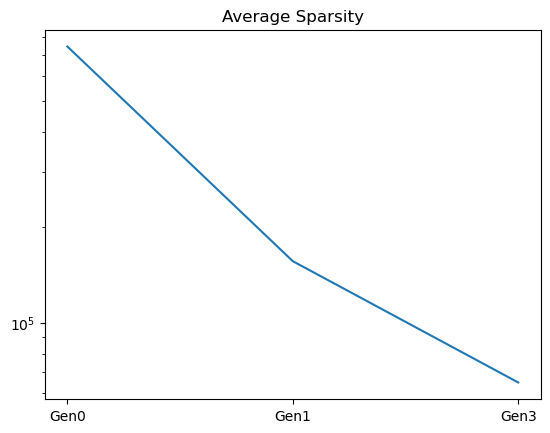

In [47]:
fig, ax = plt.subplots()
x = [0,1,2]
x_ticks = ["Gen0", "Gen1", "Gen3"]
plt.xticks(x,x_ticks)
y = avg_sparisity
plt.yscale("log")
ax.plot(x,y)
plt.title("Average Sparsity Log")
plt.show()
# Data is likely heavily skewed due to outlier

In [16]:
# Average difference (change) in sparsity 
avg_diff = []

for list in sparsitys:
    temp = []
    temp.append(list[0] - list[1])
    temp.append(list[1] - list[2])
    avg_diff.append(temp)

T_avg_diff = np.array(avg_diff).T.tolist() #transpose 

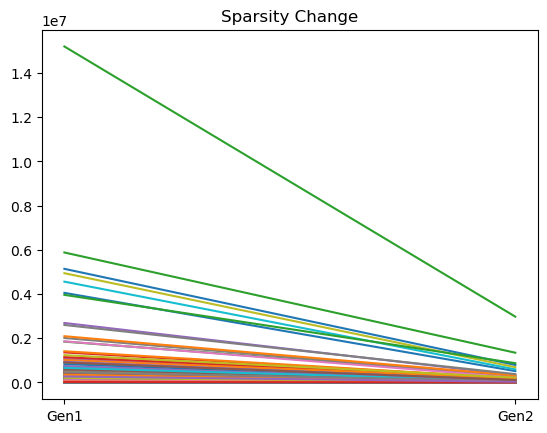

In [43]:
#difference in generations
fig, ax = plt.subplots()
# Plot the data
x = [1,2]
x_ticks = ["Gen1", "Gen2"]
plt.xticks(x,x_ticks)
y = T_avg_diff
# Set the y-axis to logarithmic scale
ax.plot(x, y)
plt.title("Sparsity Change")
plt.show()

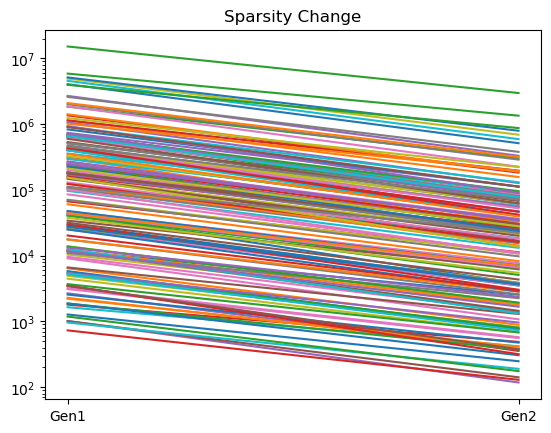

In [46]:
#difference in generations
fig, ax = plt.subplots()
# Plot the data
x = [1,2]
x_ticks = ["Gen1", "Gen2"]
plt.xticks(x,x_ticks)
y = T_avg_diff
# Set the y-axis to logarithmic scale
plt.yscale("log")
ax.plot(x, y)
plt.title("Sparsity Change Log")
plt.show()

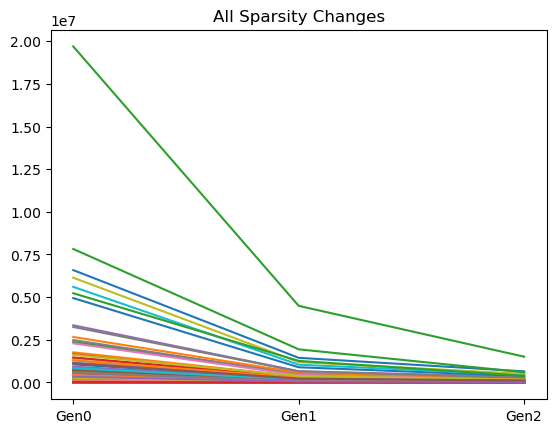

In [39]:
fig, ax = plt.subplots()
x = [0,1,2]
x_ticks = ["Gen0", "Gen1", "Gen2"]
plt.xticks(x, x_ticks)
y = np.array(sparsitys).T
ax.plot(x, y)
plt.title("All Sparsity Changes")
plt.show()

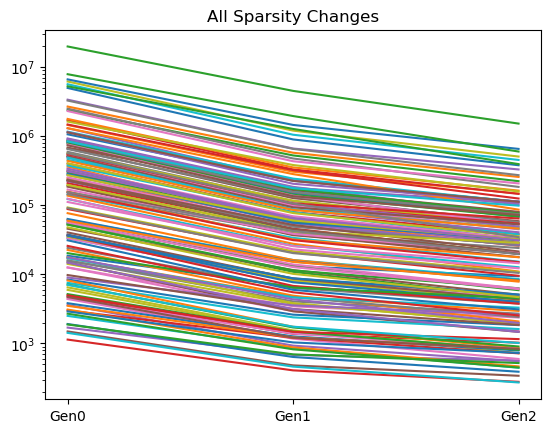

In [42]:
fig, ax = plt.subplots()
x = [0,1,2]
x_ticks = ["Gen0", "Gen1", "Gen2"]
plt.xticks(x, x_ticks)
y = np.array(sparsitys).T
plt.yscale("log")
ax.plot(x, y)
plt.title("All Sparsity Changes")
plt.show()

In [54]:
# Selecting
fronts = df.filter(["gen0-front", "gen1-front", "gen2-front"])
fronts

,gen0-front,gen1-front,gen2-front
0,"[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10...","[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10...","[[39, 54.5, 401, 101, 160], [39, 54.5, 401, 10..."
1,"[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]","[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]","[[1, 1, 3, 1.5, 5.5], [1, 1, 3, 1.5, 5.5]]"
2,"[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13...","[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13...","[[9, 10, 96, 22, 36], [9, 10, 96, 22, 36], [13..."
3,"[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152...","[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152...","[[38, 48, 382, 57, 152], [38, 48, 382, 57, 152..."
4,"[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,...","[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,...","[[30, 33, 212, 70.5, 126], [30, 33, 212, 70.5,..."
...,...,...,...
6235,"[[157, 175, 1567, 363, 636.5], [157, 175, 1567...","[[157, 175, 1567, 363, 636.5], [157, 175, 1567...","[[157, 175, 1567, 363, 636.5], [157, 175, 1567..."
6236,"[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5...","[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5...","[[414, 478.5, 3895, 1071.5, 1753], [414, 478.5..."
6237,"[[231, 274, 2150, 559, 920], [231, 274, 2150, ...","[[231, 274, 2150, 559, 920], [231, 274, 2150, ...","[[231, 274, 2150, 559, 920], [231, 274, 2150, ..."
6238,"[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10...","[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10...","[[53, 58.5, 531, 105, 199], [53, 58.5, 531, 10..."


In [24]:
# input: a front in the form of a list of list
# output: the front in the form of a dataframe
def front_to_df(front):
    C = []
    for i in range(0,len(front[0])):
        C.append("b" + str(i))
    return pd.DataFrame(front, columns=C)

In [63]:
# with 5 objective ASII
# expecting front is already a pandas d

# input: front is the form of a df 
# output: the s-metric
def HV_of_df(front):
    hyp = pg.hypervolume(front[["b0", "b1", "b2", "b3", "b4"]].values)
    ref = hyp.refpoint() # moch ref point, eventually replace with someting better? {0,0,...,0}
    hv = pg.hypervolume(np.array(front)) #turn into np array for input to pg obj
    hv_from_list = pg.hypervolume(front) # 
    try:
        h = hyp.compute(ref)
    except ValueError:
        h = 0
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [26]:
HV = []
for f in inst:
    temp_df = front_to_df(f)
    hv = HV_of_df(temp_df)
    HV.append(hv)

In [28]:
def calculate_HV(point):
    HVs = []
    fronts = point.filter(["gen0-front", "gen1-front", "gen2-front"])
    for front in fronts:
        temp_df = front_to_df(front)
        HVs.append(HV_of_df(temp_df))

    return HVs

In [56]:
def df_HV(df):
    HV = []
    for index, row in df.iterrows():
        HV.append(calculate_HV(row))
    return HV

In [64]:
HV = df_HV(fronts)

----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   3  1.5  5.5
1   1   1   3  1.5  5.5
----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   3  1.5  5.5
1   1   1   3  1.5  5.5
----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   3  1.5  5.5
1   1   1   3  1.5  5.5
----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   7  1.5  3.5
1   1   1   7  1.5  3.5
----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   7  1.5  3.5
1   1   1   7  1.5  3.5
----------------------- 
 no good ref point
   b0  b1  b2   b3   b4
0   1   1   7  1.5  3.5
1   1   1   7  1.5  3.5
----------------------- 
 no good ref point
   b0  b1  b2    b3    b4
0   3   4  35  21.5  15.5
1   3   4  35  21.5  15.5
2   3   4  17  21.5  14.0
3   3   4  24  13.0  15.5
4   3   4  17  21.5  14.0
----------------------- 
 no good ref point
   b0  b1  b2    b3    b4
0   3   4  35  21.5  15.5
1   3   

In [65]:
HV

[[67471650.0, 67471650.0, 67471650.0],
 [0, 0, 0],
 [29580.0, 29580.0, 29580.0],
 [0.0, 0.0, 0.0],
 [5874970.5, 5874970.5, 5874970.5],
 [378525.0, 378525.0, 378525.0],
 [241783542.0, 241783542.0, 241783542.0],
 [488320.0, 488320.0, 488320.0],
 [21278404.0, 21278404.0, 21278404.0],
 [814779459.0, 814779459.0, 814779459.0],
 [313500.0, 313500.0, 313500.0],
 [563732820.0, 563732820.0, 563732820.0],
 [150995460.0, 150995460.0, 150995460.0],
 [710955.0, 710955.0, 710955.0],
 [15822900.0, 15822900.0, 15822900.0],
 [88774087.5, 88774087.5, 88774087.5],
 [0.0, 0.0, 0.0],
 [80252698.75, 80252698.75, 80252698.75],
 [5230726.875, 5230726.875, 5230726.875],
 [113160.75, 113160.75, 113160.75],
 [62508600.0, 62508600.0, 62508600.0],
 [0.0, 0.0, 0.0],
 [758296.0, 758296.0, 758296.0],
 [13833125.0, 13833125.0, 13833125.0],
 [10886990.0, 10886990.0, 10886990.0],
 [22461094.5, 22461094.5, 22461094.5],
 [68942412.0, 68942412.0, 68942412.0],
 [147251520.0, 147251520.0, 147251520.0],
 [19168044.0, 19168044

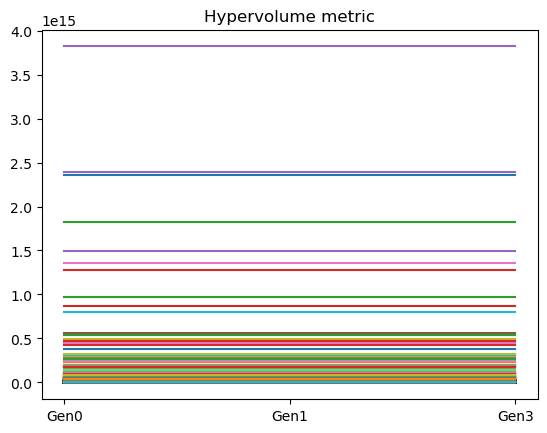

In [51]:
fig, ax = plt.subplots()
plt.title("Hypervolume metric")
X = [0, 1, 2]
x_ticks
plt.xticks(x,x_ticks)
Y = np.array(HV).T
ax.plot(X,Y)
plt.show()